In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data-export.csv')

In [3]:
data.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [4]:
data.columns = data.iloc[0]
data = data[1:]
data.reset_index(drop=True, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Session primary channel group (Default channel group)  3182 non-null   object
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   object
 2   Users                                                  3182 non-null   object
 3   Sessions                                               3182 non-null   object
 4   Engaged sessions                                       3182 non-null   object
 5   Average engagement time per session                    3182 non-null   object
 6   Engaged sessions per user                              3182 non-null   object
 7   Events per session                                     3182 non-null   object
 8   Engagement rate                                        318

In [6]:
data.describe()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
count,3182,3182,3182,3182,3182,3182,3182,3182,3182,3182
unique,7,672,147,180,103,2823,808,2025,986,678
top,Direct,2024042417,1,1,0,0,0,1,0,1
freq,672,6,335,340,393,170,393,133,393,115


In [7]:
data['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format="%Y%m%d%H")
data['Users'] = pd.to_numeric(data['Users'])
data['Sessions'] = pd.to_numeric(data['Sessions'])

grouped_data = data.groupby('Date + hour (YYYYMMDDHH)').agg({'Users':'sum', 'Sessions':'sum'})

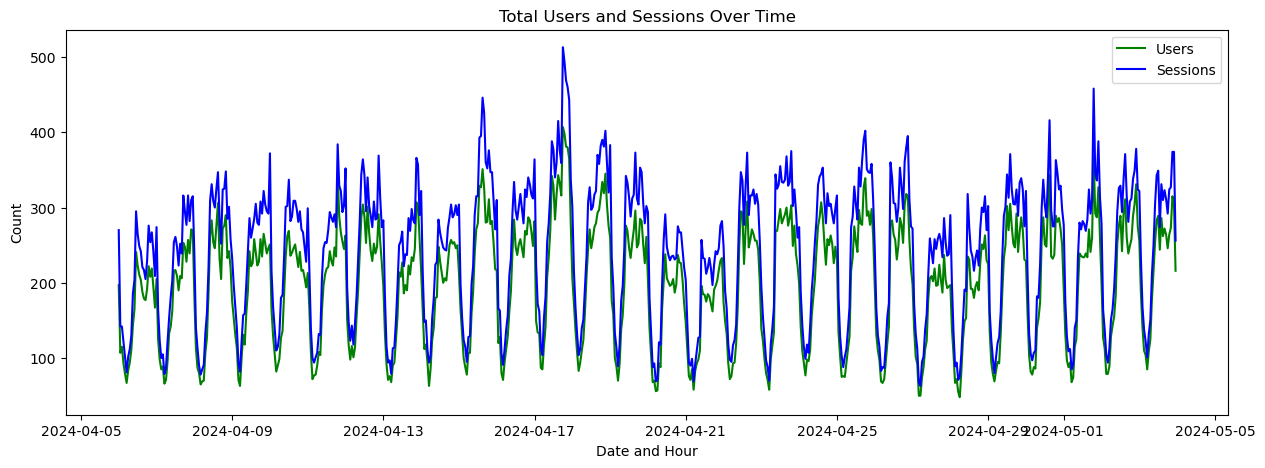

In [8]:
plt.figure(figsize=(15,5))
plt.plot(grouped_data.index, grouped_data['Users'], label="Users", color='green')
plt.plot(grouped_data.index, grouped_data['Sessions'], label="Sessions", color='blue')

plt.title('Total Users and Sessions Over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Count')

plt.legend()
plt.show()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Session primary channel group (Default channel group)  3182 non-null   object        
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   datetime64[ns]
 2   Users                                                  3182 non-null   int64         
 3   Sessions                                               3182 non-null   int64         
 4   Engaged sessions                                       3182 non-null   object        
 5   Average engagement time per session                    3182 non-null   object        
 6   Engaged sessions per user                              3182 non-null   object        
 7   Events per session                                     3182 non-null 

In [10]:
data['Engaged sessions'] = pd.to_numeric(data['Engaged sessions'])
data['Average engagement time per session'] = pd.to_numeric(data['Average engagement time per session'])
data['Engaged sessions per user'] = pd.to_numeric(data['Engaged sessions per user'])
data['Events per session'] = pd.to_numeric(data['Events per session'])
data['Engagement rate'] = pd.to_numeric(data['Engagement rate'])

In [11]:
engagement_metrics = data.groupby('Date + hour (YYYYMMDDHH)').agg({'Average engagement time per session':'mean', 'Engaged sessions per user':'mean', 'Events per session':'mean', 'Engagement rate':'mean' })

In [12]:
engagement_metrics

,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate
Date + hour (YYYYMMDDHH),,,,
2024-04-06 00:00:00,55.070258,0.607673,3.610049,0.450262
2024-04-06 01:00:00,49.115957,0.644213,4.719012,0.489905
2024-04-06 02:00:00,66.270536,0.736716,5.372024,0.595759
2024-04-06 03:00:00,52.273710,0.568105,4.691984,0.446725
2024-04-06 04:00:00,67.222410,0.603943,4.686724,0.494964
...,...,...,...,...
2024-05-03 19:00:00,53.771757,0.568971,6.224420,0.498125
2024-05-03 20:00:00,87.194145,0.436159,6.370794,0.375790
2024-05-03 21:00:00,92.804300,0.546948,6.071114,0.471312


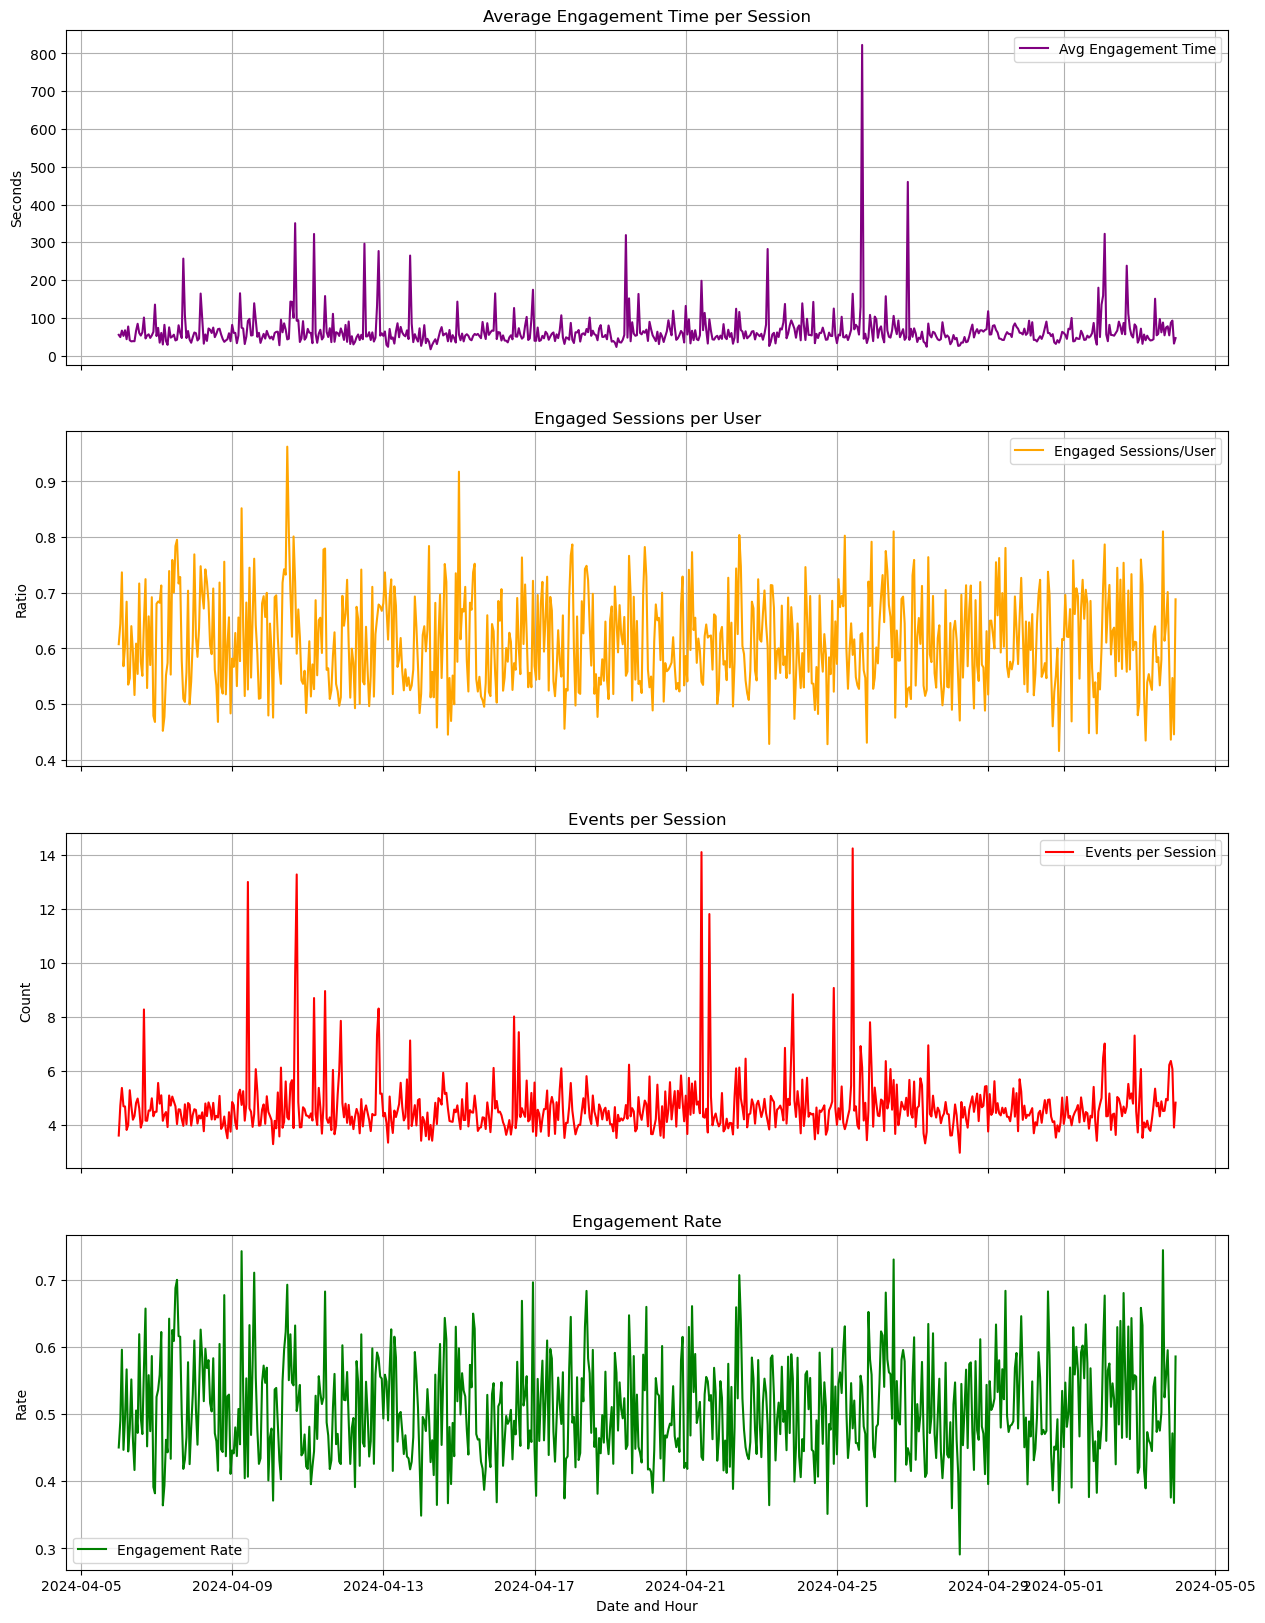

In [13]:
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(15,20))

ax[0].plot(engagement_metrics.index, engagement_metrics['Average engagement time per session'], label='Avg Engagement Time', color='purple')
ax[0].set_title('Average Engagement Time per Session')
ax[0].set_ylabel('Seconds')

ax[1].plot(engagement_metrics.index, engagement_metrics['Engaged sessions per user'], label='Engaged Sessions/User', color='orange')
ax[1].set_title('Engaged Sessions per User')
ax[1].set_ylabel('Ratio')

ax[2].plot(engagement_metrics.index, engagement_metrics['Events per session'], label='Events per Session', color='red')
ax[2].set_title('Events per Session')
ax[2].set_ylabel('Count')

ax[3].plot(engagement_metrics.index, engagement_metrics['Engagement rate'], label='Engagement Rate', color='green')
ax[3].set_title('Engagement Rate')
ax[3].set_ylabel('Rate')
ax[3].set_xlabel('Date and Hour')

for a in ax:
    a.legend()
    a.grid(True)
    
plt.show()

In [14]:
data.columns

Index(['Session primary channel group (Default channel group)',
       'Date + hour (YYYYMMDDHH)', 'Users', 'Sessions', 'Engaged sessions',
       'Average engagement time per session', 'Engaged sessions per user',
       'Events per session', 'Engagement rate', 'Event count'],
      dtype='object', name=0)

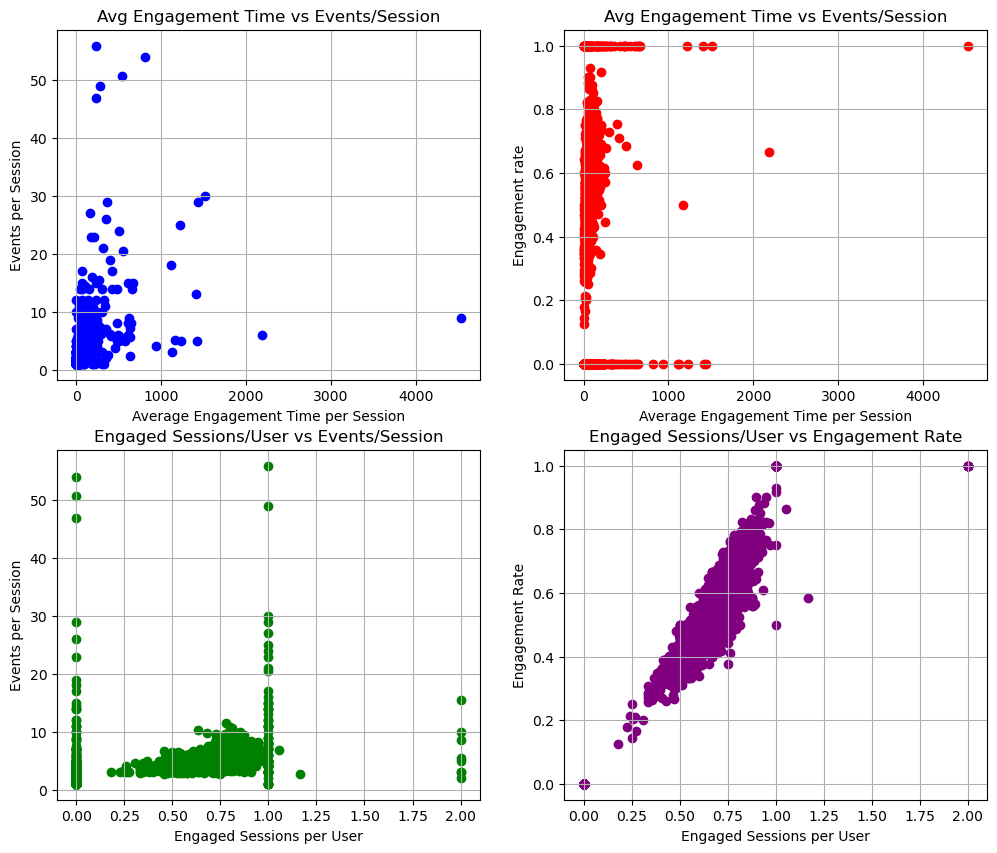

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

ax[0, 0].scatter(data['Average engagement time per session'],data['Events per session'], color='blue')
ax[0, 0].set_title('Avg Engagement Time vs Events/Session')
ax[0, 0].set_xlabel('Average Engagement Time per Session')
ax[0, 0].set_ylabel('Events per Session')
ax[0, 0].grid(True)

ax[0, 1].scatter(data['Average engagement time per session'],data['Engagement rate'], color='red')
ax[0, 1].set_title('Avg Engagement Time vs Events/Session')
ax[0, 1].set_xlabel('Average Engagement Time per Session')
ax[0, 1].set_ylabel('Engagement rate')
ax[0, 1].grid(True)

ax[1, 0].scatter(data['Engaged sessions per user'], data['Events per session'], color='green')
ax[1, 0].set_title('Engaged Sessions/User vs Events/Session')
ax[1, 0].set_xlabel('Engaged Sessions per User')
ax[1, 0].set_ylabel('Events per Session')
ax[1, 0].grid(True)

ax[1, 1].scatter(data['Engaged sessions per user'], data['Engagement rate'], color='purple')
ax[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
ax[1, 1].set_xlabel('Engaged Sessions per User')
ax[1, 1].set_ylabel('Engagement Rate')
ax[1, 1].grid(True)


plt.show()

In [16]:
channel_performance = data.groupby('Session primary channel group (Default channel group)').agg({'Users':'sum', 'Sessions':'sum', 'Engaged sessions':'sum', 'Engagement rate':'mean', 'Events per session':'mean'})

channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate']/channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session']/channel_performance['Events per session'].max()

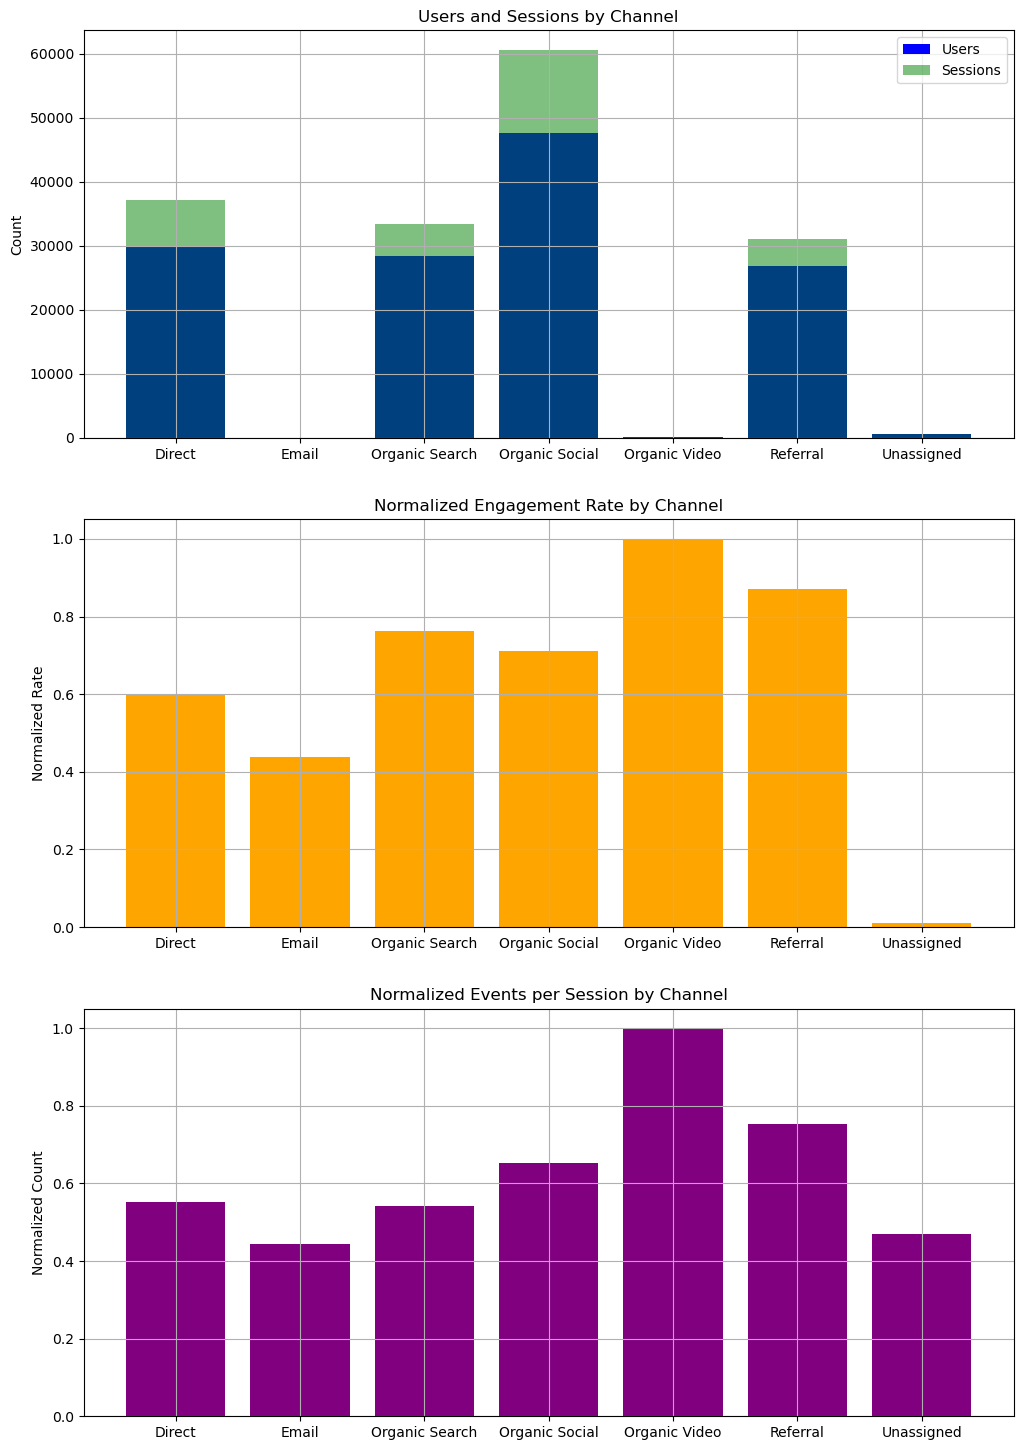

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(12,18))

ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', color='blue', alpha=1)
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', color='green', alpha=.5)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='purple')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

for a in ax:
    a.grid(True)
    
plt.show()

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [48]:
differenced_series = grouped_data['Sessions'].diff().dropna()

In [49]:
differenced_series

Date + hour (YYYYMMDDHH)
2024-04-06 01:00:00   -128.0
2024-04-06 02:00:00      0.0
2024-04-06 03:00:00    -20.0
2024-04-06 04:00:00    -20.0
2024-04-06 05:00:00    -21.0
                       ...  
2024-05-03 19:00:00     32.0
2024-05-03 20:00:00      3.0
2024-05-03 21:00:00     47.0
2024-05-03 22:00:00      0.0
2024-05-03 23:00:00   -118.0
Name: Sessions, Length: 671, dtype: float64

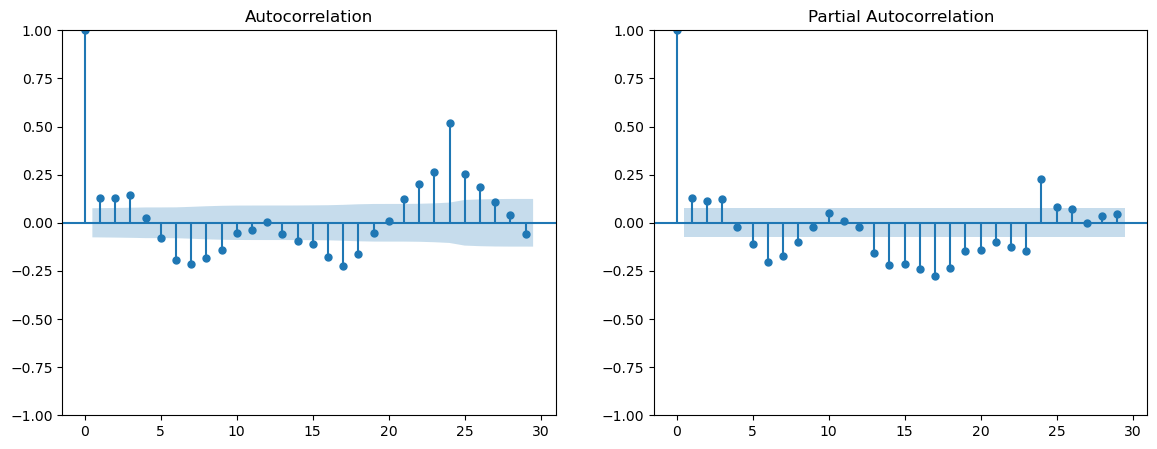

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

plot_acf(differenced_series, ax=ax[0])
plot_pacf(differenced_series, ax=ax[1])

plt.show()

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
time_series_data = grouped_data['Sess]